In [1]:
%matplotlib inline
import pandas as pd
from getdist import plots
from getdist import MCSamples

import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)


import math
from IPython.display import display, Math


In [2]:
%matplotlib inline
def generate_triangle_plot_multi(data_path_array, params, sample_label):
    """
    Generates a triangle plot for given parameters from the specified data path.
    
    Parameters:
        data_path (str): Path to the input data.
        params (list of tuples): List of tuples containing parameter names and fiducial values.
    """
    
    settings = {
        "mult_bias_correction_order": 1,
        "smooth_scale_2D": 6,   # try 4–10
        "smooth_scale_1D": 4,   # try 2–6
        "boundary_correction_order": 1,
    }
    samples_array = []
    for data_path in data_path_array:
        data_c = [read_input(data_path)][0]
        names = [param[0] for param in params]
        labels = [rf"{param[0]}" for param in params]  # LaTeX-style labels
        fiducial_values = {param[0]: param[1] for param in params}
        data_so = [[line[i] for i in range(len(params))] for line in data_c[1]["data"][1][0]]
        sample_red = MCSamples(samples=np.array(data_so), names=names, labels=labels, settings=settings)
        sample_red.removeBurn(0.4)
        samples_array.append(sample_red)
    for sample_i in samples_array:
        (sample_i.samples)
        print(len(sample_i.samples), " samples")
    # Triangle plot
    g = plots.get_subplot_plotter()
    g.triangle_plot(
        samples_array,
        legend_labels=sample_label,
        filled=True,
        alphas=[0.8, 0.55],
        contour_ls="-",
        contour_lws=1,
        fine_bins=1,
        marker_args={"linewidth": 4},
        markers=fiducial_values,
    )
    #plt.savefig(f'{data_path.replace('number_counts_samples.txt','triangle_plot.png')}')
    plt.show()

    for param_name in names:
        display(Math(sample_red.getInlineLatex(param_name, limit=1)))
    return data_so

<>:31: SyntaxWarning: invalid escape sequence '\O'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\O'
<>:31: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_13744/4281347614.py:31: SyntaxWarning: invalid escape sequence '\O'
  [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("C", 3.8)],
/tmp/ipykernel_13744/4281347614.py:31: SyntaxWarning: invalid escape sequence '\s'
  [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("C", 3.8)],


LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_lensing/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_full_analysis/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_counts/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration/cosmodc2_redmapper_lensing/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration/cosmodc2_redmapper_full_analysis/outputs_cosmo/output_r

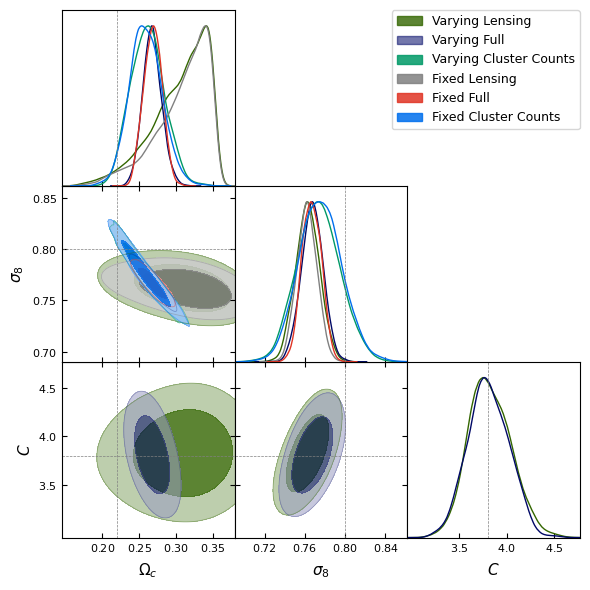

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/tmp/ipykernel_13744/4281347614.py:31: SyntaxWarning: invalid escape sequence '\O'
  [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("C", 3.8)],
/tmp/ipykernel_13744/4281347614.py:31: SyntaxWarning: invalid escape sequence '\s'
  [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("C", 3.8)],


ValueError: parameter C not found

In [13]:
### Change the home path to yours
# Directory mapping for clarity
dir_varying = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration'
dir_fixed   = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration'
suffix      = 'outputs_cosmo/output_rp/number_counts_samples.txt'

# 1-3: Varying Concentration Paths
path_home1 = f'{dir_varying}/cosmodc2_redmapper_lensing/{suffix}'
path_home2 = f'{dir_varying}/cosmodc2_redmapper_full_analysis/{suffix}'
path_home3 = f'{dir_varying}/cosmodc2_redmapper_counts/{suffix}'

# 4-6: Fixed Concentration Paths
path_home4 = f'{dir_fixed}/cosmodc2_redmapper_lensing/{suffix}'
path_home5 = f'{dir_fixed}/cosmodc2_redmapper_full_analysis/{suffix}'
path_home6 = f'{dir_fixed}/cosmodc2_redmapper_counts/{suffix}'

paths = [path_home1, path_home2, path_home3, path_home4, path_home5, path_home6]

# Labels matched to the new order
labels = [
    "Varying Lensing", 
    "Varying Full", 
    "Varying Cluster Counts", 
    "Fixed Lensing", 
    "Fixed Full", 
    "Fixed Cluster Counts"
]

data = generate_triangle_plot_multi(
    paths, 
    [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("C", 3.8)], 
    labels
)

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
7800  samples
9000  samples
7800  samples


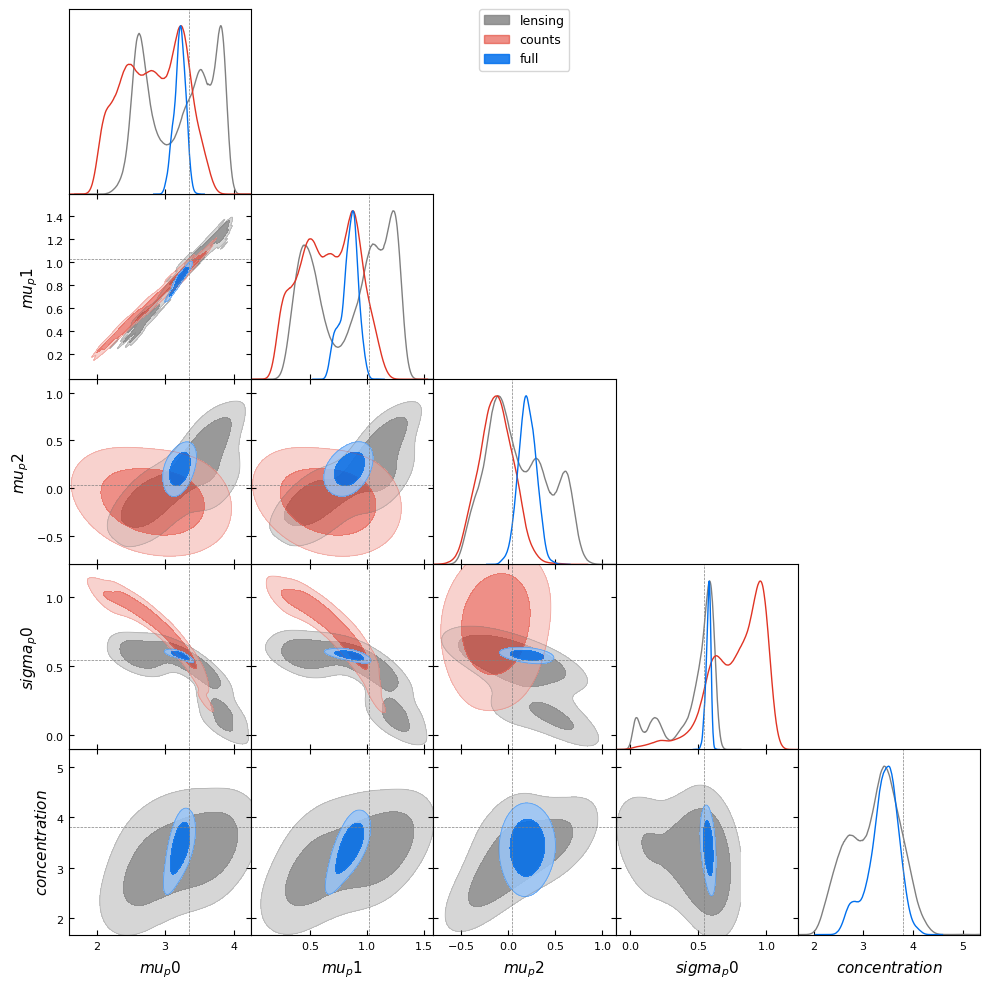

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(2.9992921160570614),
  np.float64(0.7995265005644371),
  np.float64(-0.2978150541312526),
  np.float64(0.30447073443497763),
  np.float64(2.001869845371491)],
 [np.float64(2.986062404245315),
  np.float64(0.7927166056792347),
  np.float64(-0.29232481103780383),
  np.float64(0.2955090889797165),
  np.float64(2.0153382139558085)],
 [np.float64(3.029583743044557),
  np.float64(0.7998807123843091),
  np.float64(-0.306358596791009),
  np.float64(0.3055208165739233),
  np.float64(1.977659153676612)],
 [np.float64(2.9862382030575243),
  np.float64(0.802149134389894),
  np.float64(-0.299203406025343),
  np.float64(0.3031230728455987),
  np.float64(2.006081821980802)],
 [np.float64(2.9895516928408856),
  np.float64(0.800221206236519),
  np.float64(-0.29933738439145197),
  np.float64(0.30692053732227575),
  np.float64(2.000170132768206)],
 [np.float64(2.9993309234699606),
  np.float64(0.7973687401967609),
  np.float64(-0.29735524212449094),
  np.float64(0.2979060854578377),
  np.flo

In [11]:
###Change the home path to yours
path_home4 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt'
path_home6 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt'
path_home5 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt'

paths = [path_home4, path_home5, path_home6]


data = generate_triangle_plot_multi(paths, [
    ("mu_p0",3.35),
    ("mu_p1",1.02),
    ("mu_p2", 0.037),
  ("sigma_p0",  0.54),
  ("concentration",  3.8),
], ["lensing", "counts", "full"])


<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_13744/1948421464.py:31: SyntaxWarning: invalid escape sequence '\m'
  (f"\mu_0", 3.35),
/tmp/ipykernel_13744/1948421464.py:32: SyntaxWarning: invalid escape sequence '\m'
  (f"\mu_1", 1.02),
/tmp/ipykernel_13744/1948421464.py:33: SyntaxWarning: invalid escape sequence '\m'
  (f"\mu_2", 0.037),
/tmp/ipykernel_13744/1948421464.py:34: SyntaxWarning: invalid escape sequence '\s'
  (f"\sigma_0", 0.54),


LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration/cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration/cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_c

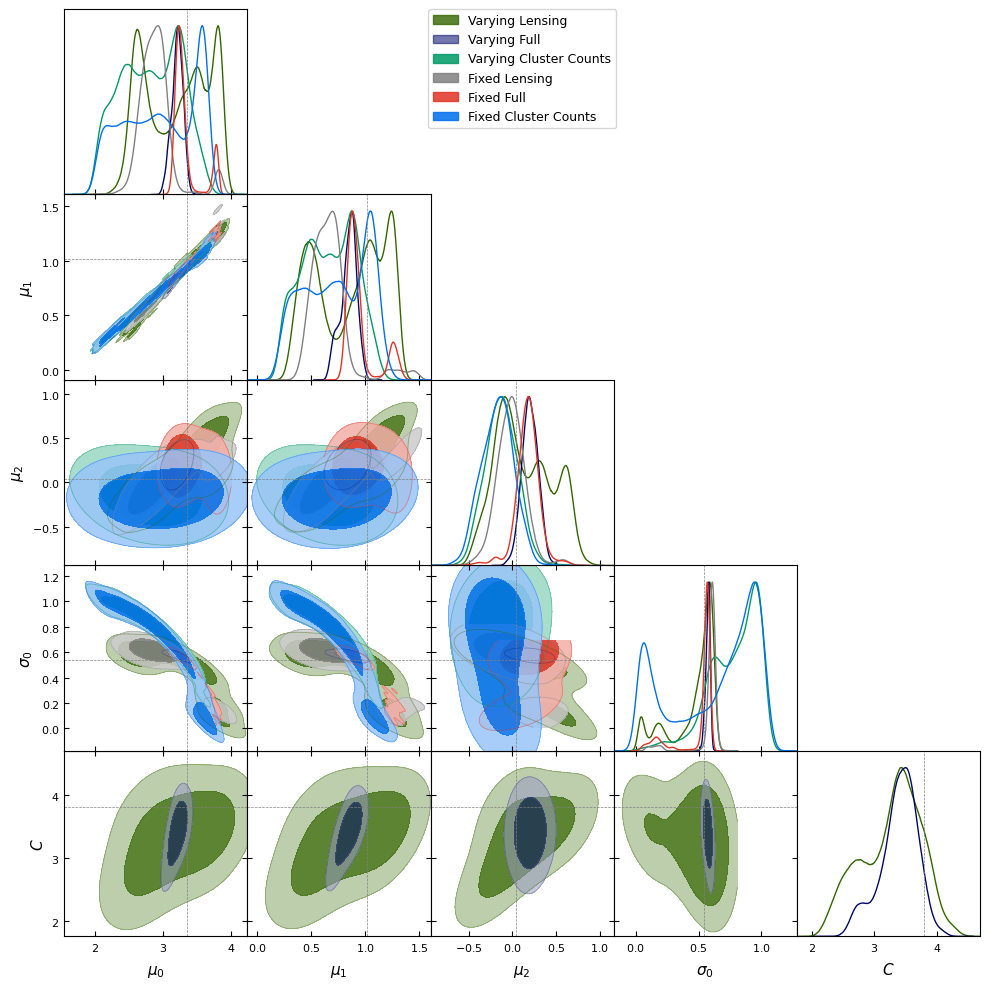

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/tmp/ipykernel_13744/1948421464.py:31: SyntaxWarning: invalid escape sequence '\m'
  (f"\mu_0", 3.35),
/tmp/ipykernel_13744/1948421464.py:32: SyntaxWarning: invalid escape sequence '\m'
  (f"\mu_1", 1.02),
/tmp/ipykernel_13744/1948421464.py:33: SyntaxWarning: invalid escape sequence '\m'
  (f"\mu_2", 0.037),
/tmp/ipykernel_13744/1948421464.py:34: SyntaxWarning: invalid escape sequence '\s'
  (f"\sigma_0", 0.54),


ValueError: parameter C not found

In [16]:
### Change the home path to yours
# Directory mapping for consistency
dir_varying = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration'
dir_fixed   = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration'
suffix      = 'outputs_mor/output_rp/number_counts_samples.txt'

# 1-3: Varying Concentration Paths (MOR)
path_v_lens = f'{dir_varying}/cosmodc2_redmapper_lensing/{suffix}'
path_v_full = f'{dir_varying}/cosmodc2_redmapper_full_analysis/{suffix}'
path_v_cnts = f'{dir_varying}/cosmodc2_redmapper_counts/{suffix}'

# 4-6: Fixed Concentration Paths (MOR)
path_f_lens = f'{dir_fixed}/cosmodc2_redmapper_lensing/{suffix}'
path_f_full = f'{dir_fixed}/cosmodc2_redmapper_full_analysis/{suffix}'
path_f_cnts = f'{dir_fixed}/cosmodc2_redmapper_counts/{suffix}'

# Organized list: Varying first, then Fixed
paths = [
    path_v_lens, path_v_full, path_v_cnts, 
    path_f_lens, path_f_full, path_f_cnts
]

# Labels matched to the path order above
labels = [
    "Varying Lensing", "Varying Full", "Varying Cluster Counts",
    "Fixed Lensing",   "Fixed Full",   "Fixed Cluster Counts"
]

# Parameters for the MOR triangle plot
params = [
    (f"\mu_0", 3.35),
    (f"\mu_1", 1.02),
    (f"\mu_2", 0.037),
    (f"\sigma_0", 0.54),
    (f"C", 3.8)
]

data = generate_triangle_plot_multi(paths, params, labels)

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
60000  samples
17400  samples
11400  samples


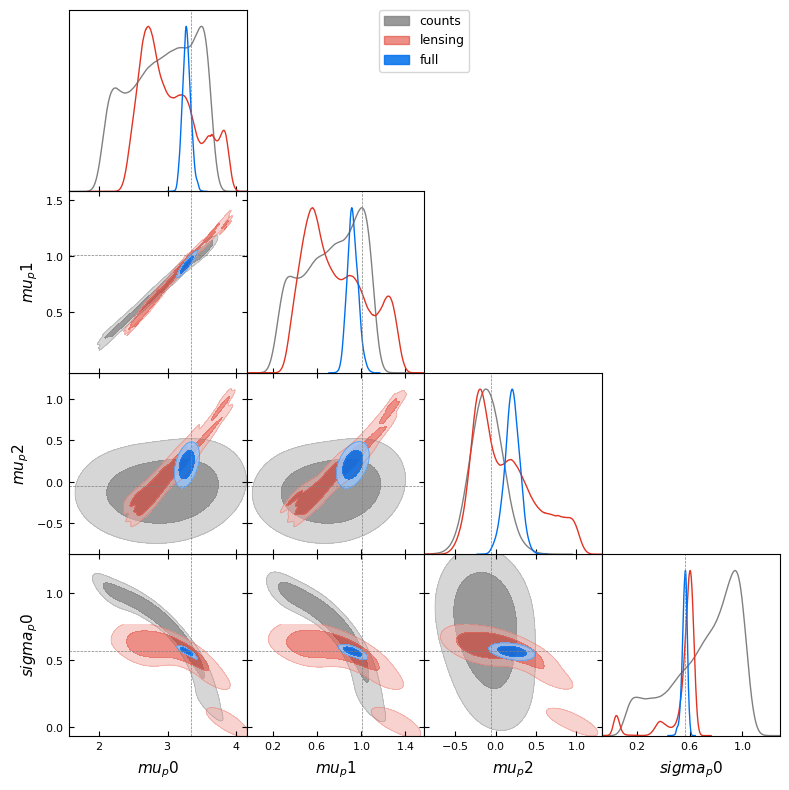

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(3.0002583663726834),
  np.float64(0.8008664114426634),
  np.float64(-0.3008679002398238),
  np.float64(0.29885508362180113)],
 [np.float64(3.0051592477760503),
  np.float64(0.7996613114081343),
  np.float64(-0.2997728917018955),
  np.float64(0.2995350762795747)],
 [np.float64(3.004496474560715),
  np.float64(0.7932992701795551),
  np.float64(-0.2986563359994874),
  np.float64(0.2999458270020519)],
 [np.float64(2.9981701607038604),
  np.float64(0.795376858493615),
  np.float64(-0.2970694231279034),
  np.float64(0.2981448116736786)],
 [np.float64(2.994359256502042),
  np.float64(0.7987291648900473),
  np.float64(-0.291892093100553),
  np.float64(0.3135585313511158)],
 [np.float64(3.000911391976742),
  np.float64(0.7959121137107115),
  np.float64(-0.3084095519230907),
  np.float64(0.3004856947572002)],
 [np.float64(2.9953608791250748),
  np.float64(0.806948232227229),
  np.float64(-0.3058084086906272),
  np.float64(0.30381441448727586)],
 [np.float64(3.0016111214231045),
  np

In [138]:
###Change the home path to yours
path_home1 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt'
path_home2 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt'
path_home3 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt'

paths = [path_home3, path_home1, path_home2]

generate_triangle_plot_multi(paths, [
    ("mu_p0",3.3441),
    ("mu_p1",1.0097),
    ("mu_p2", -0.0571),
  ("sigma_p0",  0.5627),
], ["counts","lensing", "full"])




LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_counts//outputs_both/output_rp/number_counts_samples.txt
Removed no burn in
30600  samples


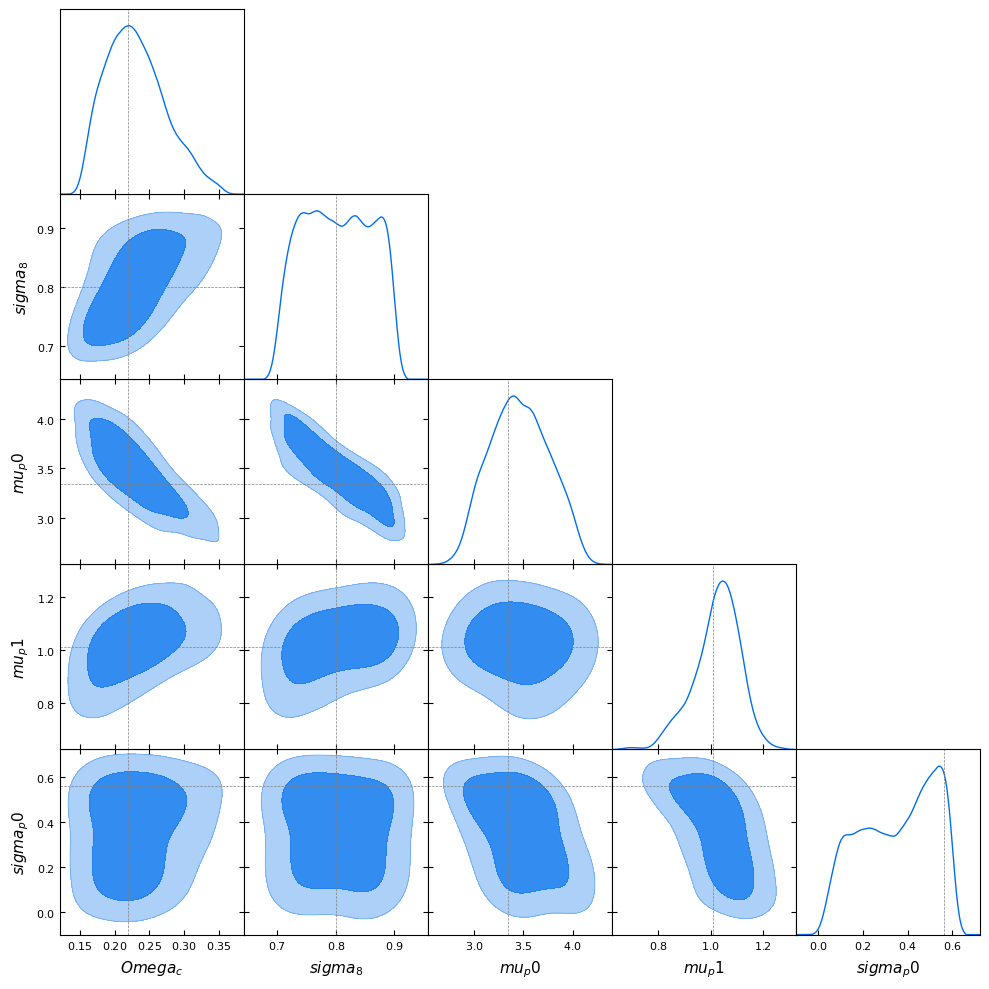

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_counts//outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
60000  samples


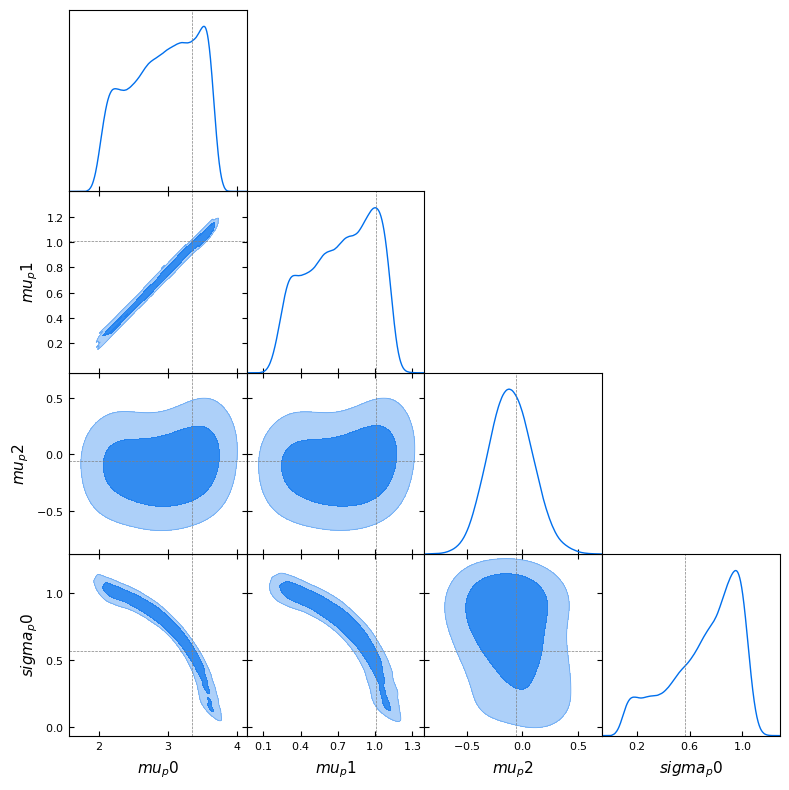

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_counts//outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
49800  samples


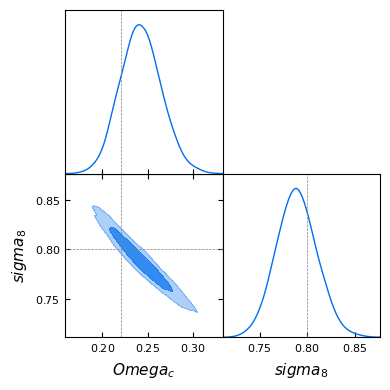

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(0.25516106179610326), np.float64(0.8501796335330677)],
 [np.float64(0.2553847751583895), np.float64(0.8501632669246502)],
 [np.float64(0.25543038608697793), np.float64(0.849536131241496)],
 [np.float64(0.2550442546259902), np.float64(0.8502187591823366)],
 [np.float64(0.2547851273633815), np.float64(0.8502139166011895)],
 [np.float64(0.2551381941906501), np.float64(0.8499594066385808)],
 [np.float64(0.2556394096837517), np.float64(0.8495205176082244)],
 [np.float64(0.25532160124435227), np.float64(0.8498404808812102)],
 [np.float64(0.2550669139097368), np.float64(0.8496821135864441)],
 [np.float64(0.2550224614538872), np.float64(0.8499478590791134)],
 [np.float64(0.2555371987685367), np.float64(0.8497780490621324)],
 [np.float64(0.25548401783937386), np.float64(0.849991963754418)],
 [np.float64(0.25497472277684735), np.float64(0.8500088584467224)],
 [np.float64(0.2554211236457812), np.float64(0.849737630263087)],
 [np.float64(0.2550165385579638), np.float64(0.8510093200937

In [92]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_counts/'
g = plots.get_subplot_plotter()
generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.3441),
    ("mu_p1",1.0097),
    ("sigma_p0",  0.5627),
])

generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",3.3441),
    ("mu_p1",1.0097),
    ("mu_p2", -0.0571),
  ("sigma_p0",  0.5627),
])

generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
60000  samples
7800  samples
7800  samples


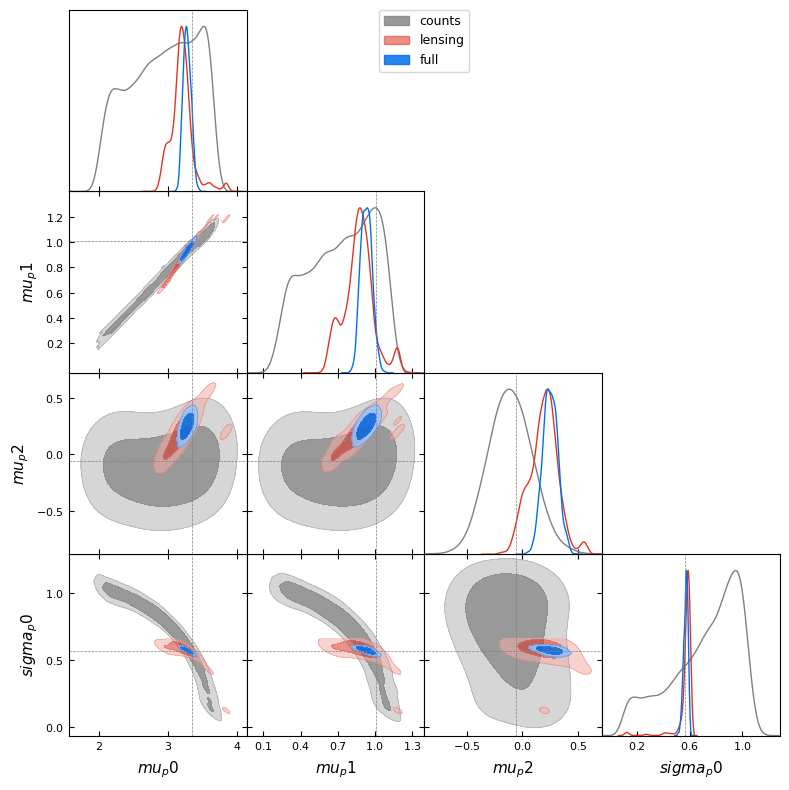

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(3.002067628051674),
  np.float64(0.800523487688225),
  np.float64(-0.30163275815643553),
  np.float64(0.29513706643787074)],
 [np.float64(3.002917384051954),
  np.float64(0.8045285900131713),
  np.float64(-0.3011859779412127),
  np.float64(0.2972261968678223)],
 [np.float64(2.9998338731017586),
  np.float64(0.7995798417824198),
  np.float64(-0.3007732668018279),
  np.float64(0.300869590989295)],
 [np.float64(3.0038205193476837),
  np.float64(0.8003312217185988),
  np.float64(-0.2996323408245617),
  np.float64(0.3061966373303038)],
 [np.float64(2.9986425108893267),
  np.float64(0.7920116860068642),
  np.float64(-0.2899352016506951),
  np.float64(0.29460008543742877)],
 [np.float64(2.997066088223437),
  np.float64(0.801796327026632),
  np.float64(-0.3045555865331151),
  np.float64(0.30004614335311275)],
 [np.float64(3.000935097681188),
  np.float64(0.796186241490663),
  np.float64(-0.29535096837422953),
  np.float64(0.29570108124402406)],
 [np.float64(3.0046322749423706),
  

In [91]:
###Change the home path to yours
path_home1 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt'
path_home2 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt'
path_home3 = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt'

paths = [path_home3, path_home1, path_home2]

generate_triangle_plot_multi(paths, [
    ("mu_p0",3.3441),
    ("mu_p1",1.0097),
    ("mu_p2", -0.0571),
  ("sigma_p0",  0.5627),
], ["counts","lensing", "full"])




LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_full_analysis//outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
3600  samples


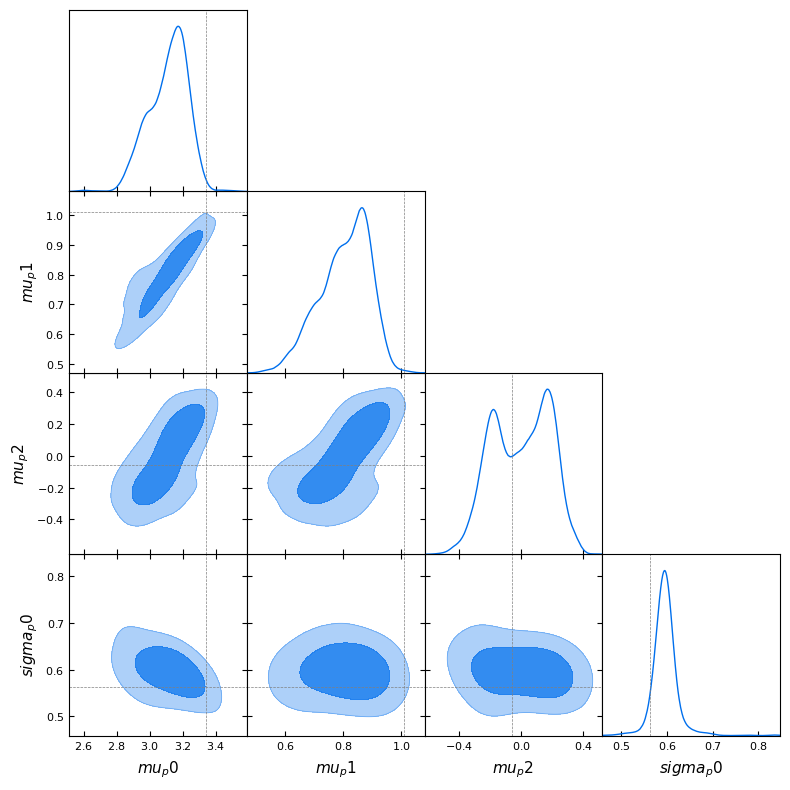

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(3.002067628051674),
  np.float64(0.800523487688225),
  np.float64(-0.30163275815643553),
  np.float64(0.29513706643787074)],
 [np.float64(3.002917384051954),
  np.float64(0.8045285900131713),
  np.float64(-0.3011859779412127),
  np.float64(0.2972261968678223)],
 [np.float64(2.9998338731017586),
  np.float64(0.7995798417824198),
  np.float64(-0.3007732668018279),
  np.float64(0.300869590989295)],
 [np.float64(3.0038205193476837),
  np.float64(0.8003312217185988),
  np.float64(-0.2996323408245617),
  np.float64(0.3061966373303038)],
 [np.float64(2.9986425108893267),
  np.float64(0.7920116860068642),
  np.float64(-0.2899352016506951),
  np.float64(0.29460008543742877)],
 [np.float64(2.997066088223437),
  np.float64(0.801796327026632),
  np.float64(-0.3045555865331151),
  np.float64(0.30004614335311275)],
 [np.float64(3.000935097681188),
  np.float64(0.796186241490663),
  np.float64(-0.29535096837422953),
  np.float64(0.29570108124402406)],
 [np.float64(3.0046322749423706),
  

In [31]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_full_analysis/'

# generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
#     ("Omega_c", 0.22),
#     ("sigma_8", 0.800),
#     ("mu_p0",3.3441),
#     ("mu_p1",1.0097),
#     ("sigma_p0",  0.5627),
# ])

generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",3.3441),
    ("mu_p1",1.0097),
    ("mu_p2", -0.0571),
  ("sigma_p0",  0.5627),
])

# generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
#     ("Omega_c", 0.22),
#     ("sigma_8", 0.800),
# ])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing//outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
1200  samples


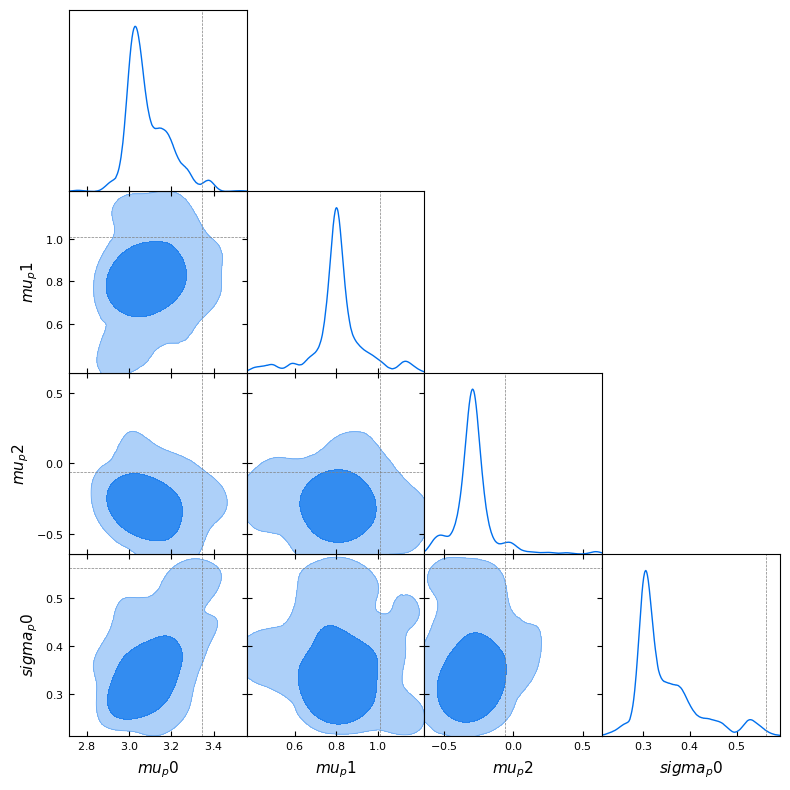

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(3.0003674536885763),
  np.float64(0.8000292258158415),
  np.float64(-0.3002567648076853),
  np.float64(0.29977082364830954)],
 [np.float64(3.000323934136909),
  np.float64(0.8002013425805456),
  np.float64(-0.3016962126293146),
  np.float64(0.2995499653948921)],
 [np.float64(3.0012493090871923),
  np.float64(0.7995419956686347),
  np.float64(-0.3002216921345428),
  np.float64(0.2997607941510291)],
 [np.float64(2.9981911796464917),
  np.float64(0.8005812948626798),
  np.float64(-0.29846651839784505),
  np.float64(0.2993820360545197)],
 [np.float64(3.0035559200939286),
  np.float64(0.7993826412935512),
  np.float64(-0.2972377803760552),
  np.float64(0.2999569158262547)],
 [np.float64(3.0016815972314483),
  np.float64(0.8003996906304658),
  np.float64(-0.2992824283935274),
  np.float64(0.2990888183727573)],
 [np.float64(3.004617931935381),
  np.float64(0.8004911654238214),
  np.float64(-0.3001583831649703),
  np.float64(0.3001383909628752)],
 [np.float64(3.0004470930373626),


In [43]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing/'

# generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
#     ("Omega_c", 0.22),
#     ("sigma_8", 0.800),
#     ("mu_p0",3.3441),
#     ("mu_p1",1.0097),
#     ("sigma_p0",  0.5627),
# ])

generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",3.3441),
    ("mu_p1",1.0097),
    ("mu_p2", -0.0571),
  ("sigma_p0",  0.5627),
])

# generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
#     ("Omega_c", 0.22),
#     ("sigma_8", 0.800),
# ])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing///outputs_mor/output_rp/number_counts_samples.txt
Removed no burn in
1200  samples


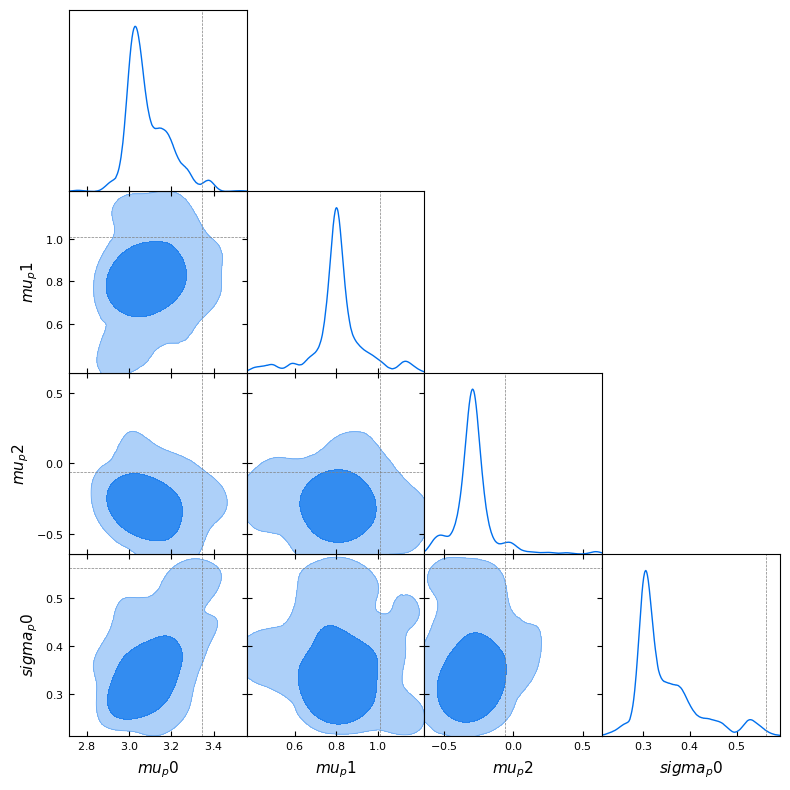

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[np.float64(3.0003674536885763),
  np.float64(0.8000292258158415),
  np.float64(-0.3002567648076853),
  np.float64(0.29977082364830954)],
 [np.float64(3.000323934136909),
  np.float64(0.8002013425805456),
  np.float64(-0.3016962126293146),
  np.float64(0.2995499653948921)],
 [np.float64(3.0012493090871923),
  np.float64(0.7995419956686347),
  np.float64(-0.3002216921345428),
  np.float64(0.2997607941510291)],
 [np.float64(2.9981911796464917),
  np.float64(0.8005812948626798),
  np.float64(-0.29846651839784505),
  np.float64(0.2993820360545197)],
 [np.float64(3.0035559200939286),
  np.float64(0.7993826412935512),
  np.float64(-0.2972377803760552),
  np.float64(0.2999569158262547)],
 [np.float64(3.0016815972314483),
  np.float64(0.8003996906304658),
  np.float64(-0.2992824283935274),
  np.float64(0.2990888183727573)],
 [np.float64(3.004617931935381),
  np.float64(0.8004911654238214),
  np.float64(-0.3001583831649703),
  np.float64(0.3001383909628752)],
 [np.float64(3.0004470930373626),


In [42]:
###Change the home path to yours
home = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing//'

# generate_triangle_plot(home + "/outputs_both/output_rp/number_counts_samples.txt", [
#     ("Omega_c", 0.22),
#     ("sigma_8", 0.800),
#     ("mu_p0",3.3441),
#     ("mu_p1",1.0097),
#     ("sigma_p0",  0.5627),
# ])

generate_triangle_plot(home + "/outputs_mor/output_rp/number_counts_samples.txt", [
    ("mu_p0",3.3441),
    ("mu_p1",1.0097),
    ("mu_p2", -0.0571),
  ("sigma_p0",  0.5627),
])

# generate_triangle_plot(home + "/outputs_cosmo/output_rp/number_counts_samples.txt", [
#     ("Omega_c", 0.22),
#     ("sigma_8", 0.800),
# ])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt


UnboundLocalError: cannot access local variable 'settings' where it is not associated with a value

In [65]:
import pyccl as ccl
hmf = ccl.halos.MassFuncDespali16(mass_def="200c")
cosmo = ccl.Cosmology(
    Omega_c=0.2607,      # Cold dark matter density
    Omega_b=0.04897,     # Baryon density
    h=0.6766,            # Hubble parameter
    sigma8=0.8102,       # Matter fluctuation amplitude
    n_s=0.9665,          # Spectral index
)

#cl_delta_sigma.vectorized= True
cl_abundance = ClusterAbundance(cosmo=cosmo, halo_mass_function=hmf)
pivot_mass, pivot_redshift = 14.625862906, 0.6
comp_dist = CompletenessAguena16()
pur_dist = PurityAguena16()
mass_distribution = MurataUnbinned(pivot_mass, pivot_redshift)
mass_distribution_binned = MurataBinned(pivot_mass, pivot_redshift)
redshift_distribution = SpectroscopicRedshift()



In [66]:
##### Parameters to be used in both recipes #####
mass_grid_size = 60
redshift_grid_size = 20
proxy_grid_size = 20
sky_area = 440
mass_interval = (12.5, 15.0)
cluster_theory = cl_abundance
z_bin = (0.2, 0.4)
z_points = np.linspace(z_bin[0], z_bin[1], redshift_grid_size) 
proxy_bin = (1.0, 1.3)
proxy_points = np.linspace(proxy_bin[0], proxy_bin[1], proxy_grid_size)
radius_center = np.array([4.0])
#################################################

recipe_integral = ExactBinnedClusterRecipe(
        mass_interval=mass_interval,
        cluster_theory=cluster_theory,
        redshift_distribution=redshift_distribution,
        mass_distribution=mass_distribution_binned,
        completeness=comp_dist,
    )

recipe_grid = GridBinnedClusterRecipe(
        mass_interval=mass_interval,
        cluster_theory=cluster_theory,
        redshift_distribution=redshift_distribution,
        mass_distribution=mass_distribution,
        completeness=comp_dist,
    proxy_grid_size=proxy_grid_size,
    redshift_grid_size=redshift_grid_size,
    mass_grid_size=mass_grid_size,
    )

In [67]:
print(recipe_integral.evaluate_theory_prediction_counts())

TypeError: ExactBinnedClusterRecipe.evaluate_theory_prediction_counts() missing 3 required positional arguments: 'z_edges', 'log_proxy_edges', and 'sky_area'